In [17]:
!pip install tensorflow pandas numpy matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [7]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [10]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1) 
])

/home/gitpod/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0111 - val_loss: 7.5184e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0011 - val_loss: 7.4719e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 7.4344e-04 - val_loss: 8.3490e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.8776e-04 - val_loss: 9.3265e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 7.3392e-04 - val_loss: 0.0016
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 6.5133e-04 - val_loss: 7.9282e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.5332e-04 - val_loss: 0.0013
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 7.1541e-04 - val_loss: 0.0019
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.7539e-04 - val_loss: 5.6224e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.4952e-04 - val_loss: 5.9213e-04
Epo

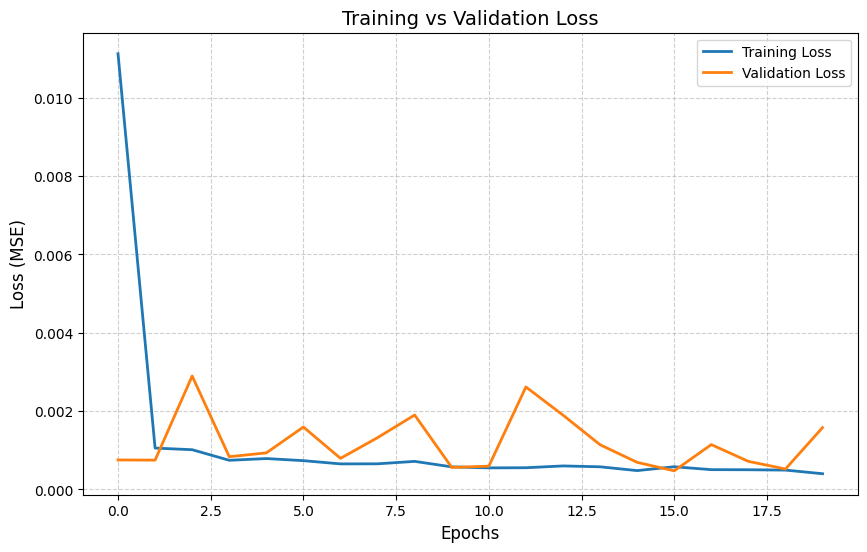

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Training vs Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [13]:
model.save('stock_lstm_model.h5')